In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import KFold
from IPython.display import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from matplotlib.pyplot import plot as plt
import string
from matplotlib.pyplot import figure
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import seaborn as sns

## Background

Kiva is a non-profit microfinance organization that connects people around the world with entrepreneurs and students in developing countries to reduce poverty through inequality. Since its inception in 2005, Kiva has provided life-changing loans to 2.5 million people in 80 countries through crowdfunding (https://www.kiva.org), with support starting at 25 per unit. Since its inception in 2005, more than 1 billion in loans have been made to 2.5 million people in 80 countries.


## Problem Statement 

The reality is that it is impossible to know how much money you can raise through crowdfunding until you actually put out the call for projects. In the absence of a clear answer, they need to think about what they want to do with the money they borrow, the appropriate repayment period and the amount they want to raise. 




In [68]:
df = pd.read_csv('train.csv')

In [69]:
df.head()

,LOAN_ID,ORIGINAL_LANGUAGE,DESCRIPTION,DESCRIPTION_TRANSLATED,LOAN_AMOUNT,IMAGE_ID,ACTIVITY_NAME,SECTOR_NAME,LOAN_USE,COUNTRY_CODE,COUNTRY_NAME,TOWN_NAME,CURRENCY_POLICY,CURRENCY_EXCHANGE_COVERAGE_RATE,CURRENCY,TAGS,REPAYMENT_INTERVAL,DISTRIBUTION_MODEL
0,1733169,English,Teodora is a 50-year-old married woman from th...,Teodora is a 50-year-old married woman from th...,100,3115271,Weaving,Arts,"to purchase materials like nipa palm, bamboo ...",PH,Philippines,"Maribojoc, Bohol",shared,0.1,PHP,#Elderly,monthly,field_partner
1,1546998,English,Diego is 32 years old and lives in the municip...,Diego is 32 years old and lives in the municip...,1350,2870403,Barber Shop,Services,"to buy two hair clippers, a new barber chair, ...",CO,Colombia,Apartadó,shared,0.1,COP,"user_favorite, user_favorite",monthly,field_partner
2,1808517,Spanish,"Osman, es un joven de 27 años de edad, soltero...","Osman is a young man, 27 years old, single, an...",225,3215705,Farming,Agriculture,to purchase sacks of fertilizers to care for a...,HN,Honduras,"Nueva Frontera, Santa Barbara.",shared,0.1,HNL,NaN,bullet,field_partner
3,1452940,English,"His name is Nino, 31 years old, married to Che...","His name is Nino, 31 years old, married to Che...",350,2745031,Motorcycle Transport,Transportation,"to pay for fuel, tires and change oil for his ...",PH,Philippines,"Silang, Cavite",shared,0.1,PHP,user_favorite,monthly,field_partner
4,1778420,English,"Pictured above is Teresa, often described as a...","Pictured above is Teresa, often described as a...",625,3083800,Farming,Agriculture,to purchase hybrid seeds and fertilizer to imp...,KE,Kenya,Mumias,shared,0.1,KES,"#Eco-friendly, #Sustainable Ag, #Parent, #Elde...",bullet,field_partner


In [70]:
df.shape

(91333, 18)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91333 entries, 0 to 91332
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   LOAN_ID                          91333 non-null  int64  
 1   ORIGINAL_LANGUAGE                91333 non-null  object 
 2   DESCRIPTION                      91333 non-null  object 
 3   DESCRIPTION_TRANSLATED           91332 non-null  object 
 4   LOAN_AMOUNT                      91333 non-null  int64  
 5   IMAGE_ID                         91333 non-null  int64  
 6   ACTIVITY_NAME                    91333 non-null  object 
 7   SECTOR_NAME                      91333 non-null  object 
 8   LOAN_USE                         91333 non-null  object 
 9   COUNTRY_CODE                     91333 non-null  object 
 10  COUNTRY_NAME                     91333 non-null  object 
 11  TOWN_NAME                        88573 non-null  object 
 12  CURRENCY_POLICY   

## EDA 

Before diving into the main discussion, it is important to visualise the data to oberve a general pattern of dataset.
For clear visualisation purpose, Tableau was deployed for the graph such as mapping.


### Original Language vs Loan Amount

Original language in this context means which languages in the description are used for crowdfunding in this fund raising platform. 

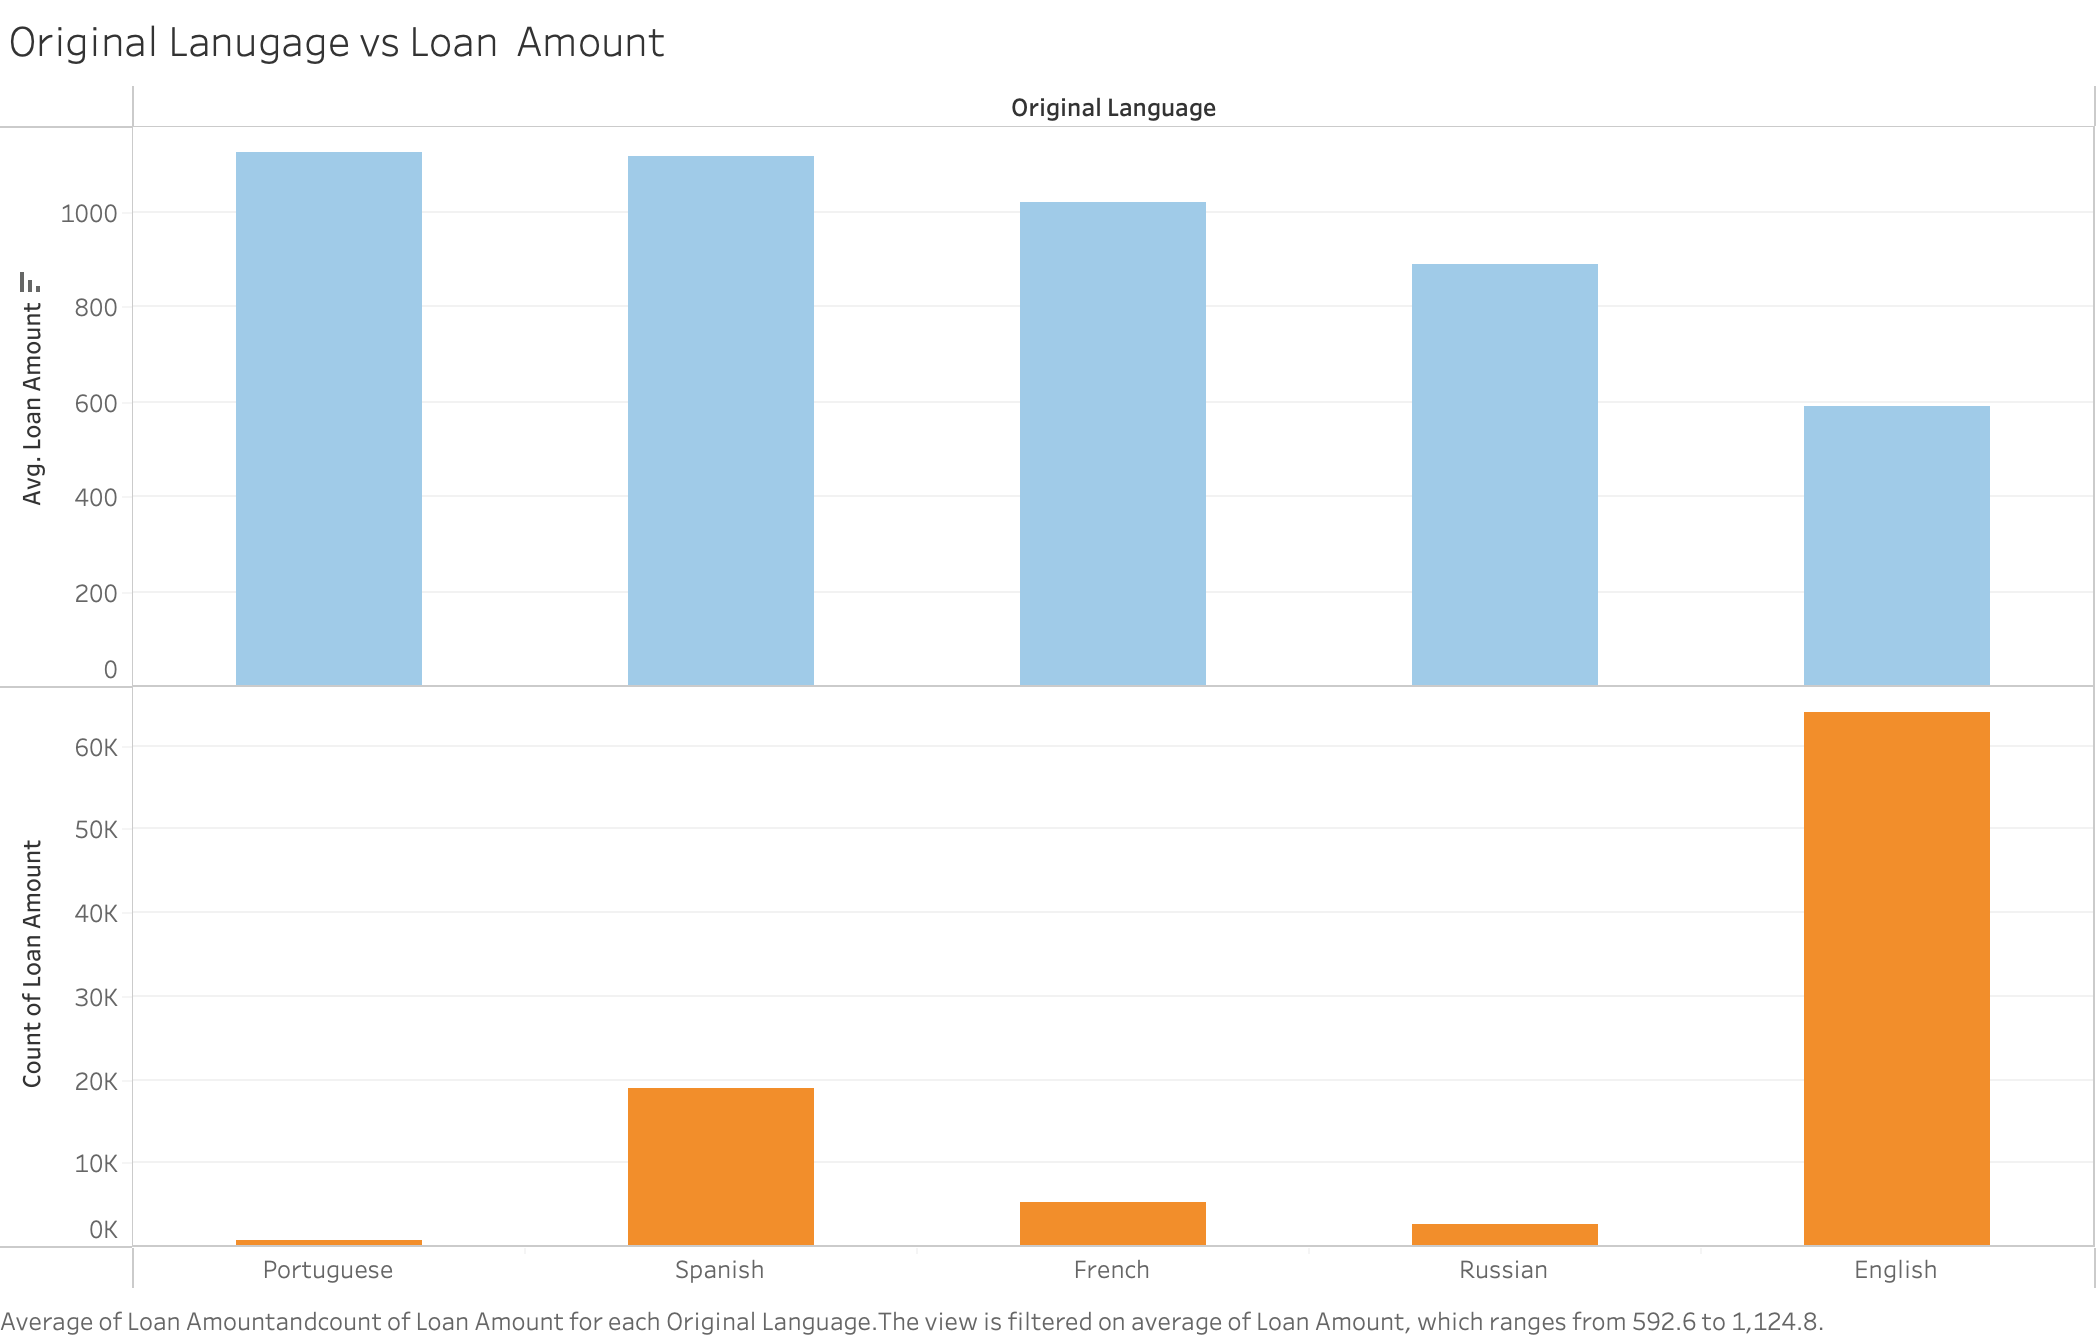

In [72]:
Image("Original Lanugage vs Loan  Amount.png")



Those bar charts indicate several intersting findings. 

[1] English seems to account for many portions in comparison to other languages.

[2] Although there are not many loan amounts written in languages other than English. On average, they successfully    raised the funding.  

## Financial Information vs Loan Amount

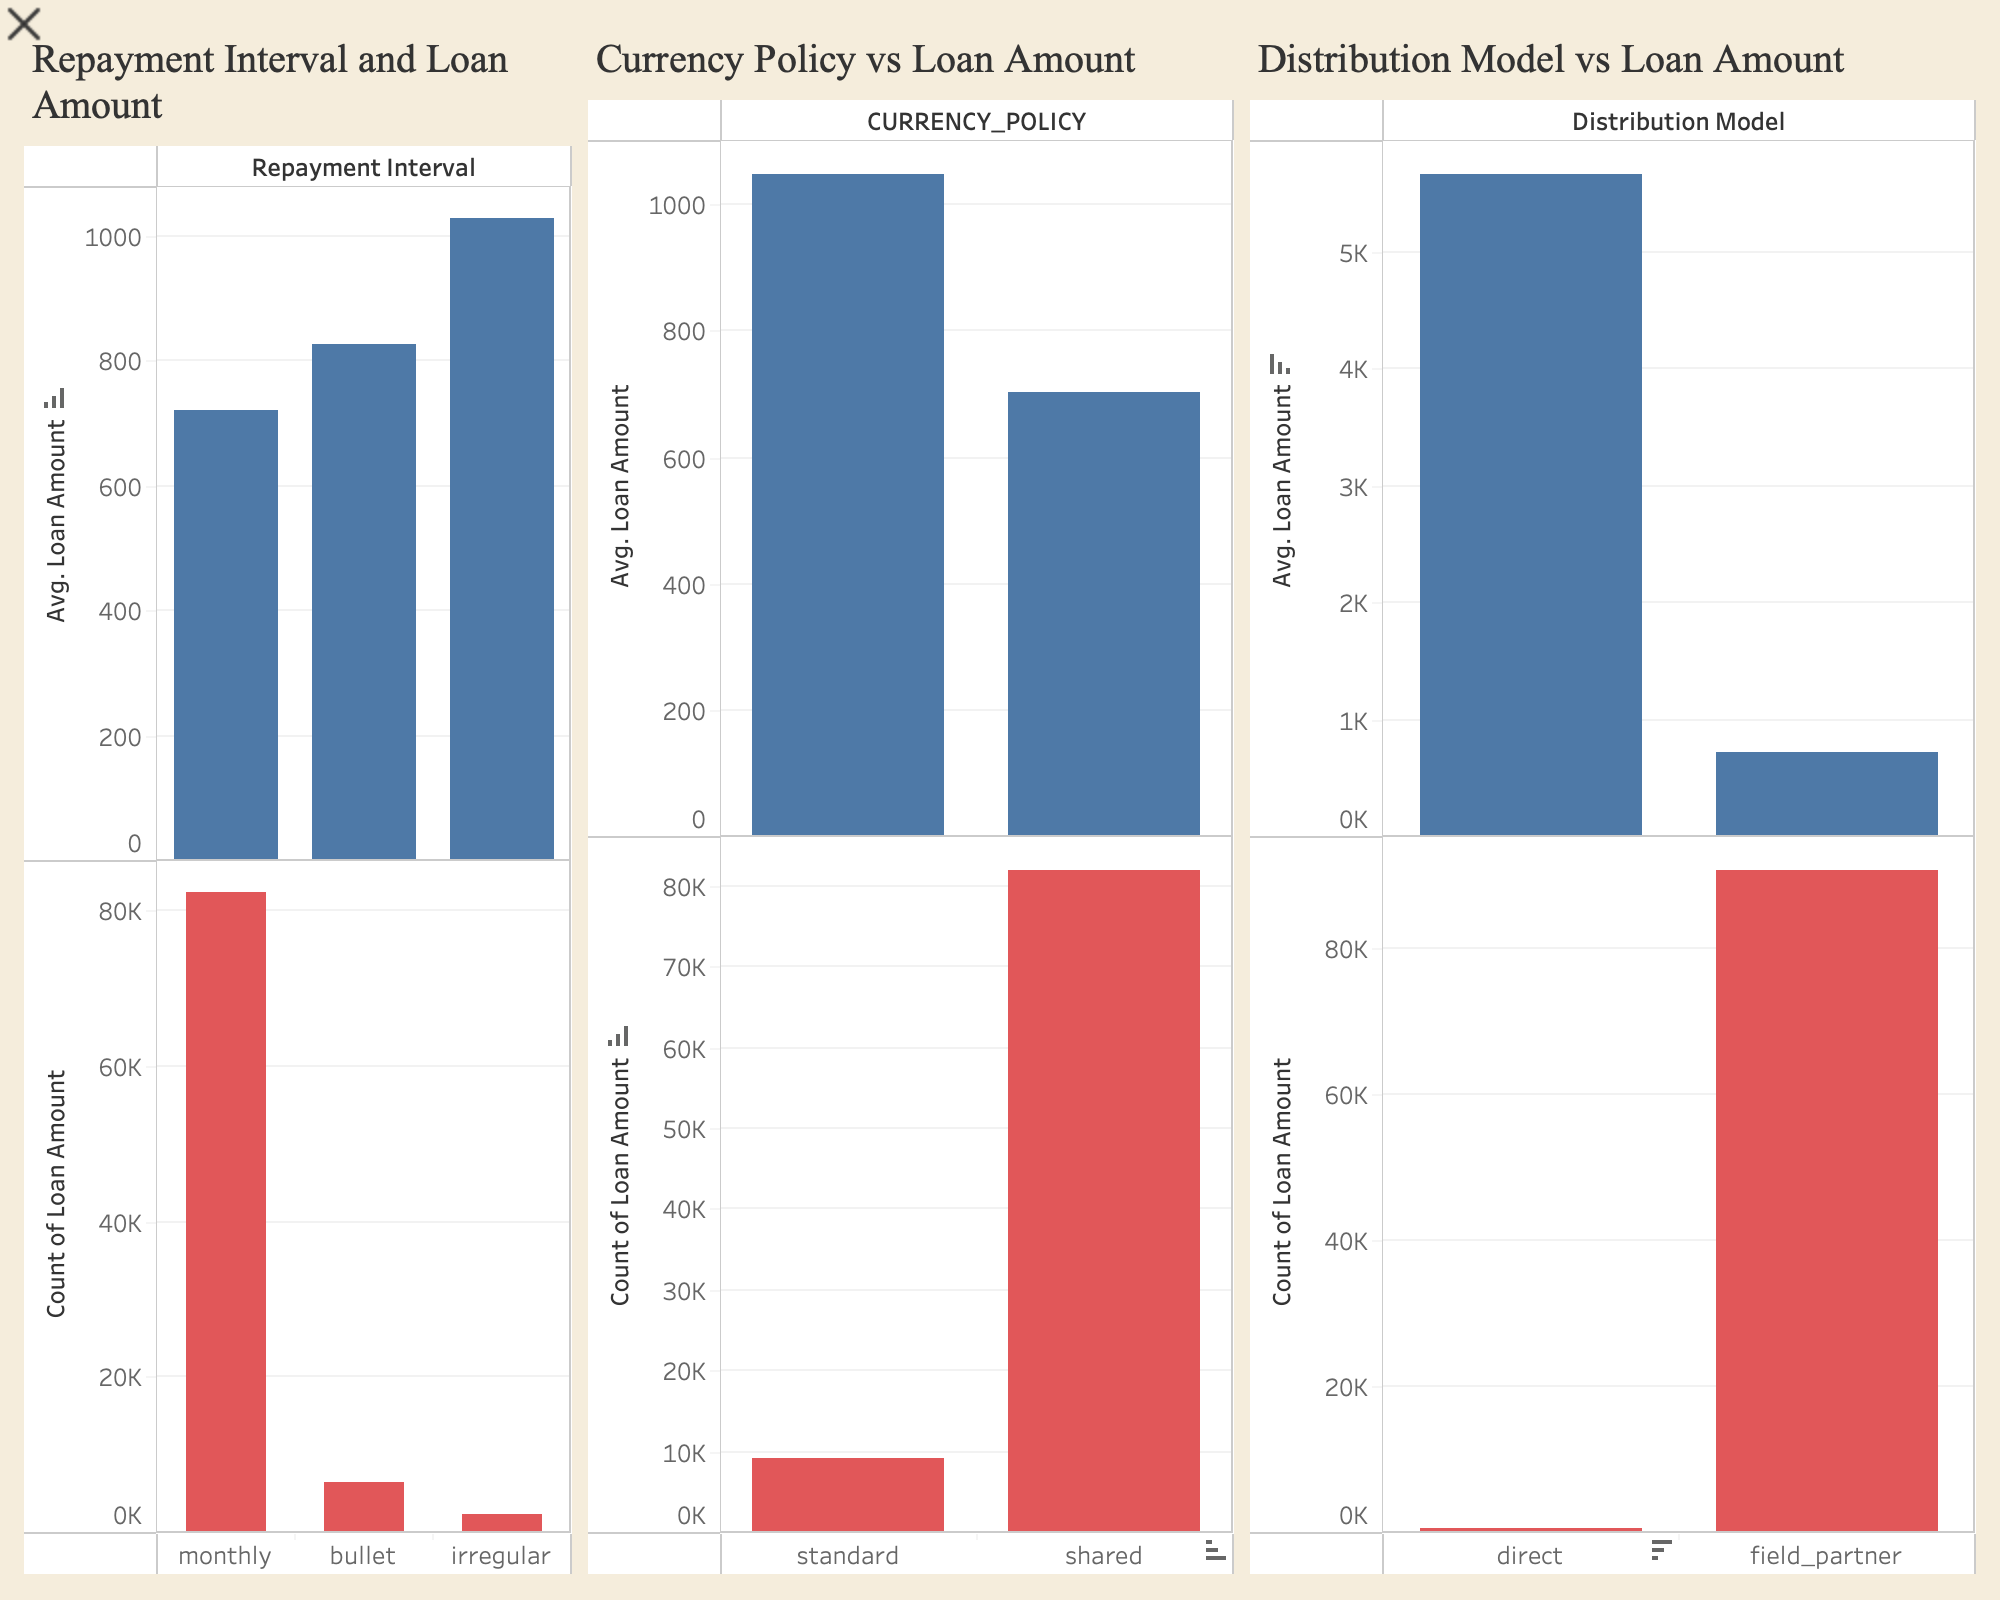

In [73]:
Image('Financial Information .png')

Before giving an analysis, More detailed explanations for variables regarding financial information were provided as follows: 


Distribution Model 
    
  The actual lending is usually done by local microfinance institutions called field partners, which are classified as     field_partner / direct to distinguish them from loans directly controlled by Kiva.
    
Repayment Interval
    
   This service is not offering a donation. Since this is a loan, Debtor have to mention their repayment plan
    
Currency Policy
     
   Filed partners can choose to manage their own foreign exchange risk or to participate in a risk programme where the       risk is shared between lenders.
    
    
    
    

## Sector Name and Activity vs Loan Amount

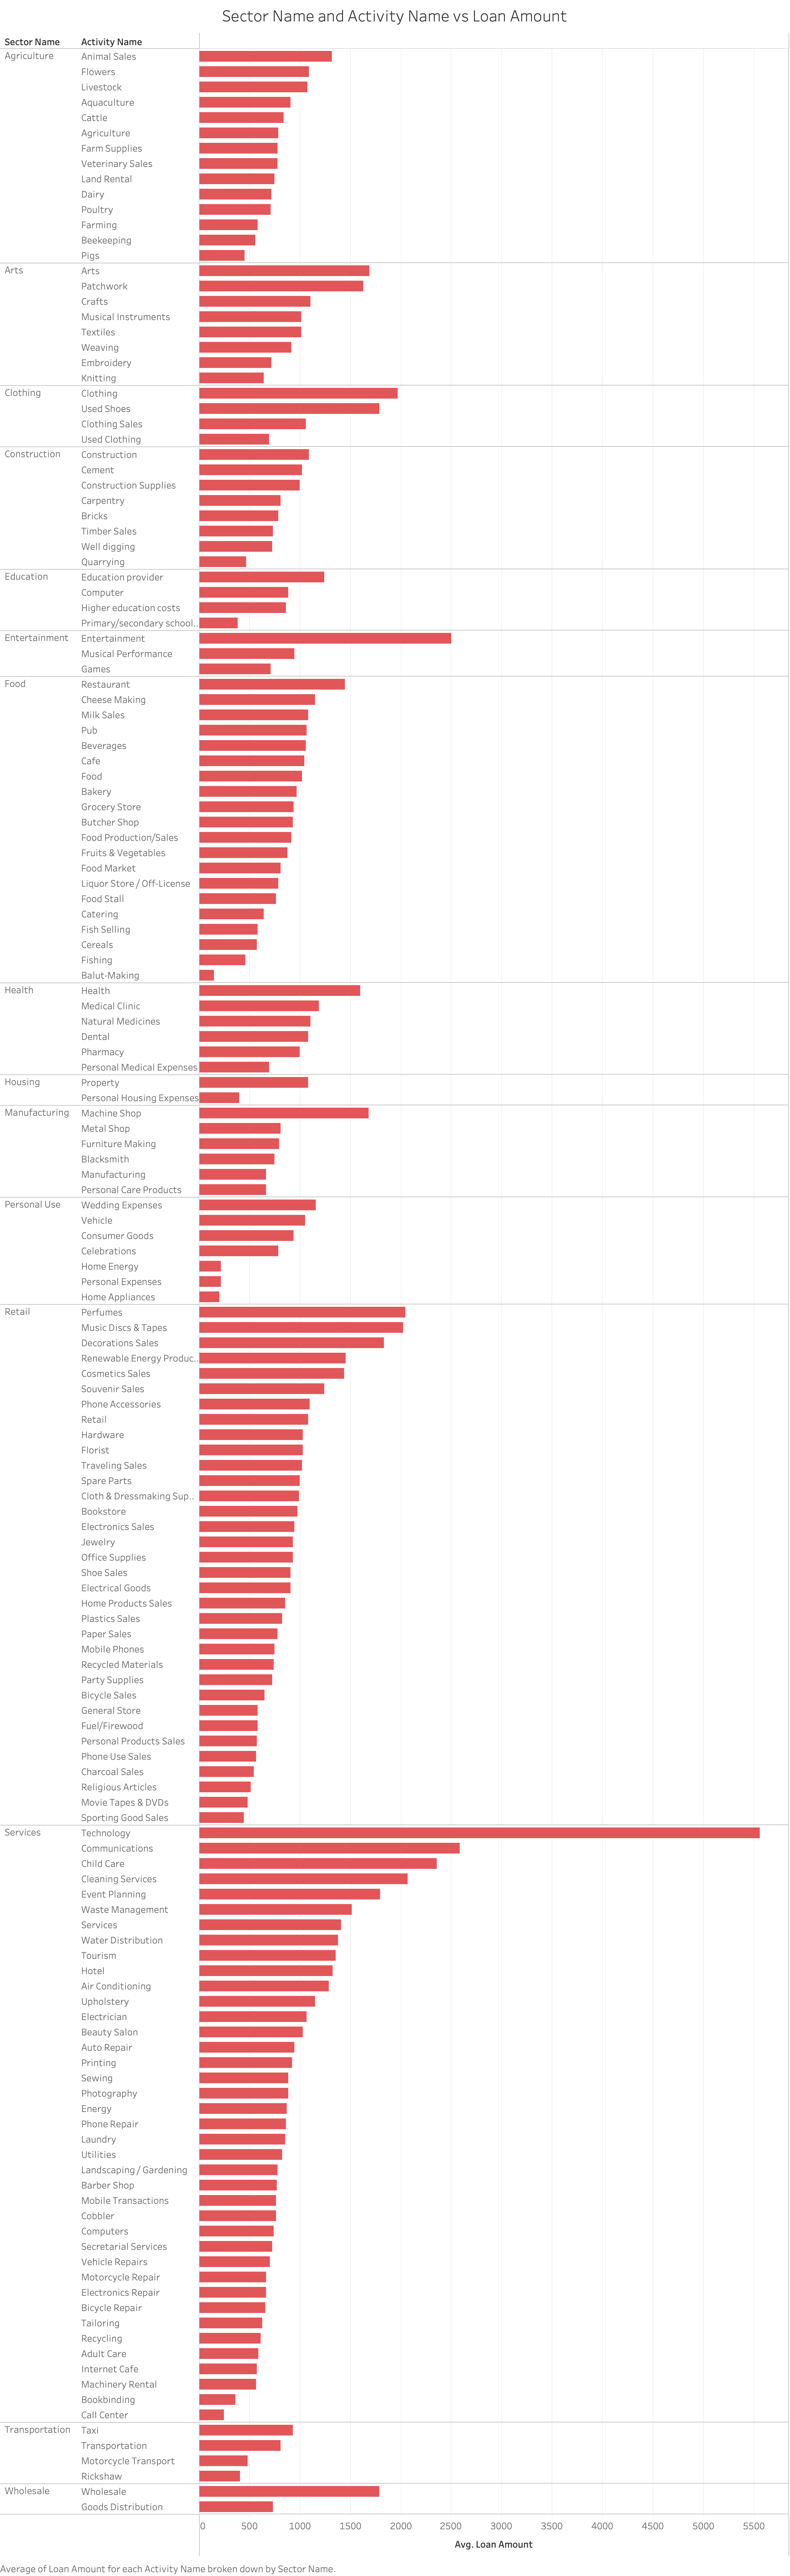

In [74]:
Image('Sector Name and Activity Name vs Loan Amount.png')

## Country Trend for Fundraising

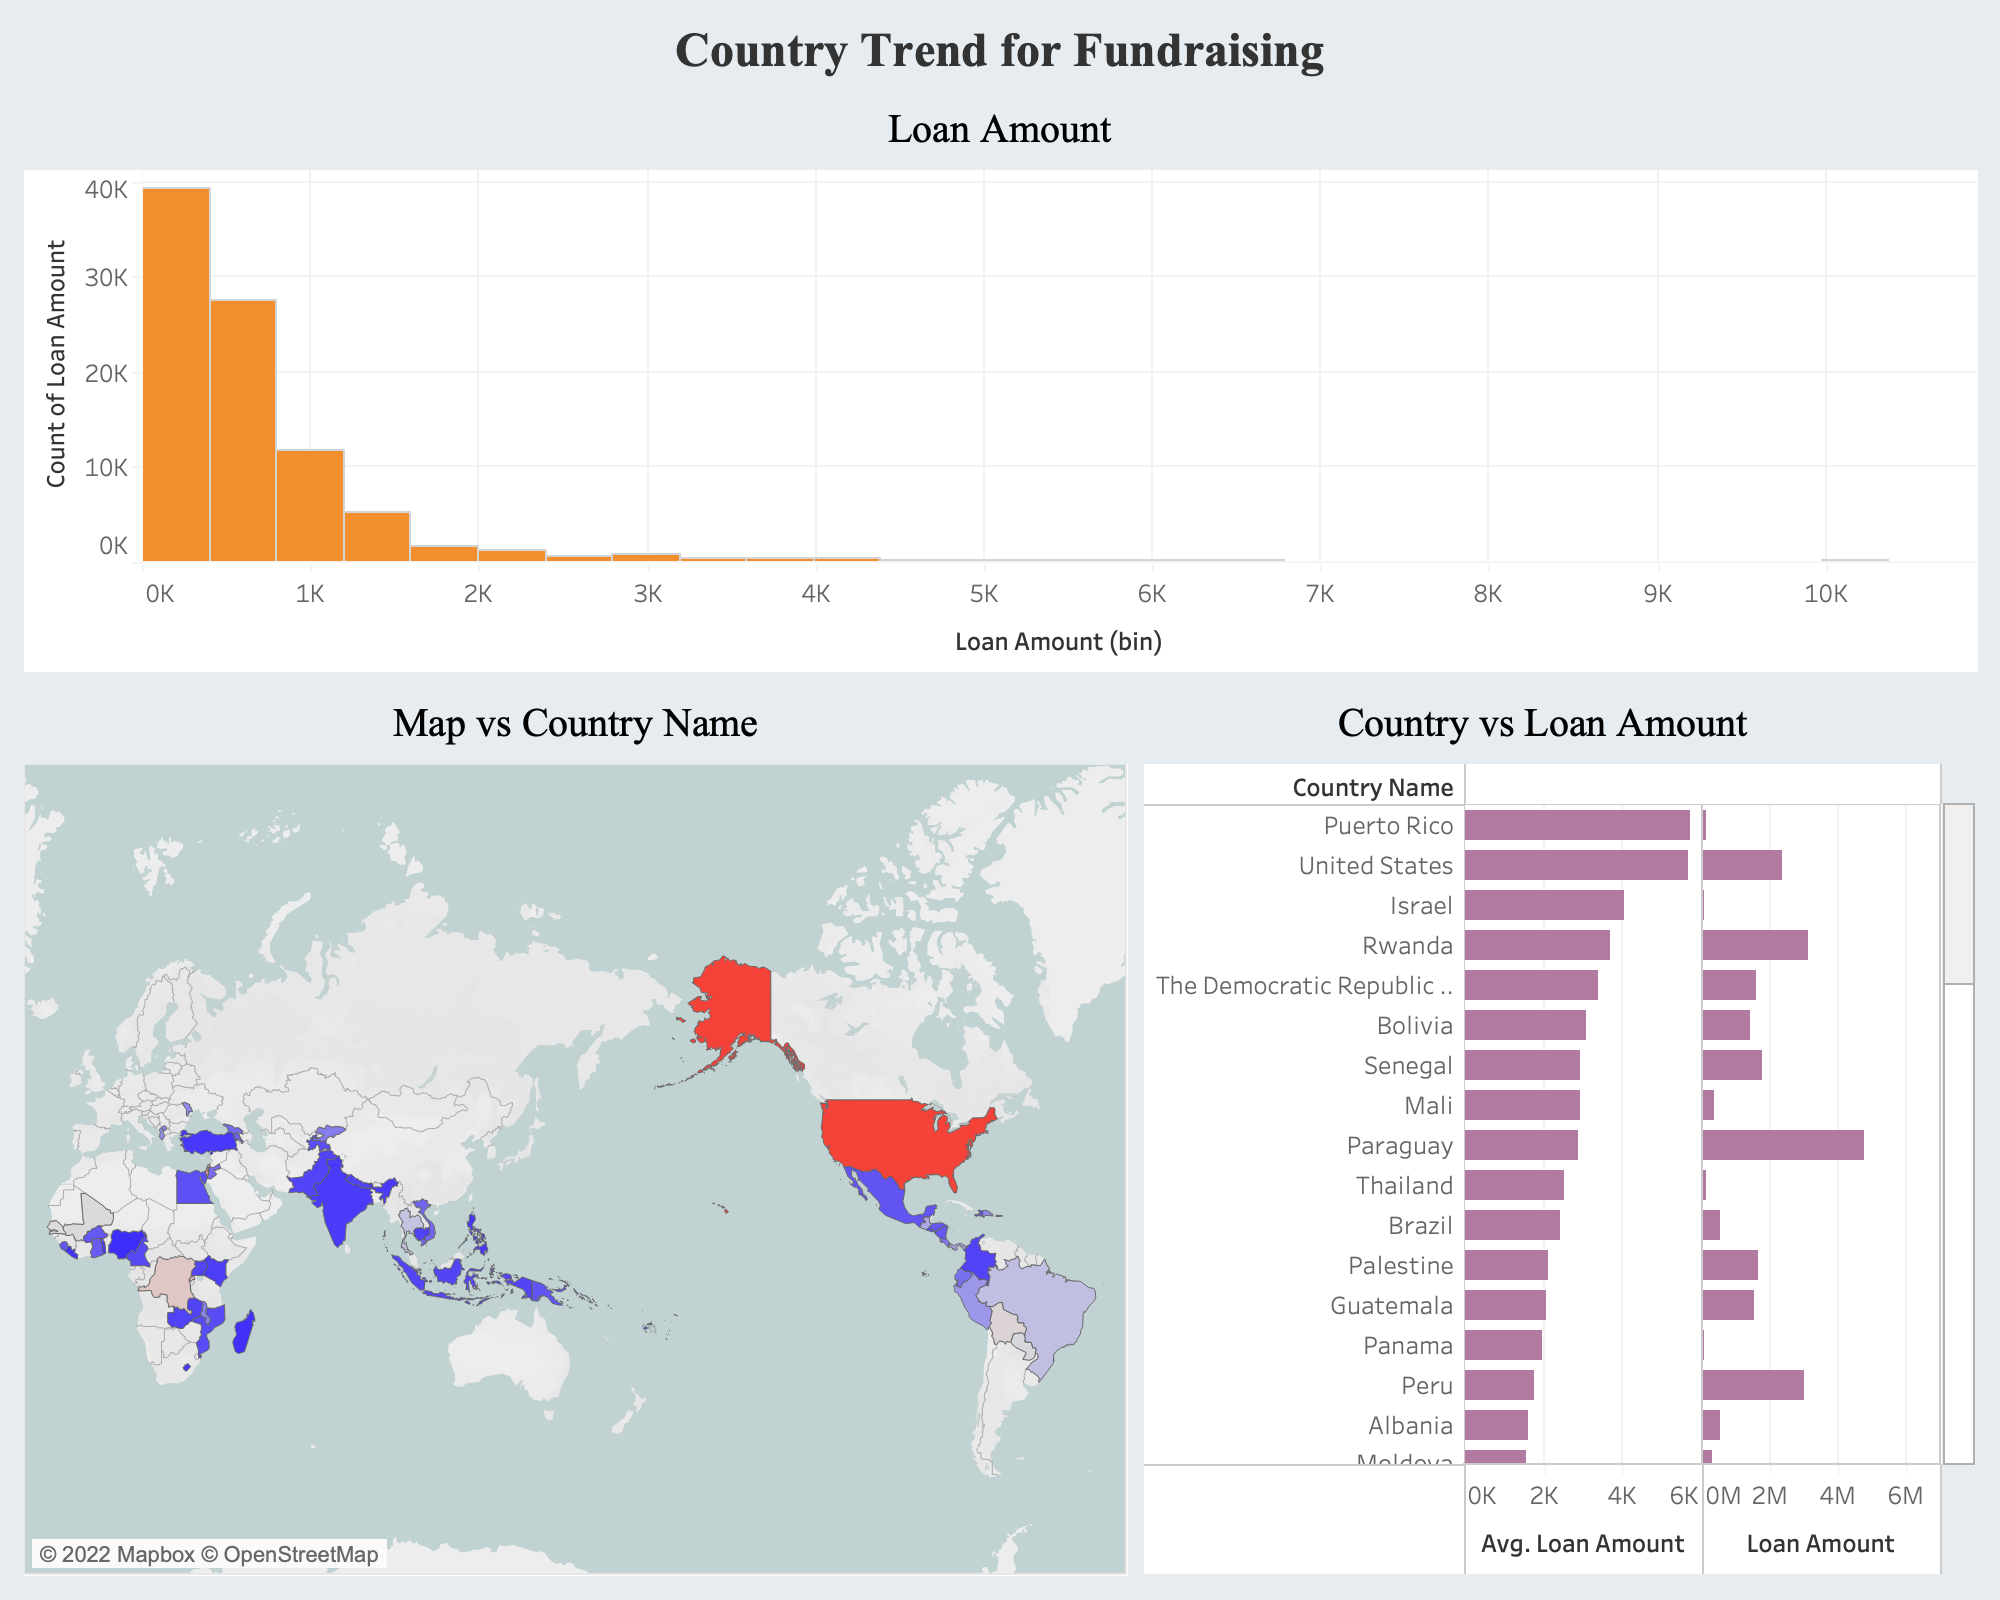

In [75]:
Image('Country Trend for Fundraising.png')

## Translated Description

Before visualising it, flling out the missing value for translated description. 

In [76]:
missed_translation = df[df['DESCRIPTION_TRANSLATED'].isnull()]
missed_translation


,LOAN_ID,ORIGINAL_LANGUAGE,DESCRIPTION,DESCRIPTION_TRANSLATED,LOAN_AMOUNT,IMAGE_ID,ACTIVITY_NAME,SECTOR_NAME,LOAN_USE,COUNTRY_CODE,COUNTRY_NAME,TOWN_NAME,CURRENCY_POLICY,CURRENCY_EXCHANGE_COVERAGE_RATE,CURRENCY,TAGS,REPAYMENT_INTERVAL,DISTRIBUTION_MODEL
72195,1478847,English,Tursun is 62 years old and she comes from the ...,NaN,800,2783623,Livestock,Agriculture,to buy some livestock and start a new business.,TJ,Tajikistan,Yavan,shared,0.1,TJS,"#Animals, #Elderly",irregular,field_partner


It seems like we can copy and paste the same description from the original as original description is English

In [77]:
df.loc[72195,'DESCRIPTION']

'Tursun is 62 years old and she comes from the Yavan district of Tajikistan where she lives with her children and her husband. She is quiet, intelligent, dynamic, and responsible. As someone who is always looking for something new to get involved in, she has decided to start a new business. She is used to working hard and cannot stay at home with nothing to do. Tursun wants to get involved in animal husbandry, an activity which she has learned from one of her neighbors. She is taking this loan to buy a few head of livestock. She is confident that she will succeed. Thanks to the loan that she has requested, she will be able to buy a few head of livestock and to start her new business. With high hopes, Tursun is turning to you for support.'

In [78]:
df['DESCRIPTION_TRANSLATED'] = df['DESCRIPTION_TRANSLATED'].fillna('Tursun is 62 years old and she comes from the Yavan district of Tajikistan where she lives with her children and her husband. She is quiet, intelligent, dynamic, and responsible. As someone who is always looking for something new to get involved in, she has decided to start a new business. She is used to working hard and cannot stay at home with nothing to do. Tursun wants to get involved in animal husbandry, an activity which she has learned from one of her neighbors. She is taking this loan to buy a few head of livestock. She is confident that she will succeed. Thanks to the loan that she has requested, she will be able to buy a few head of livestock and to start her new business. With high hopes, Tursun is turning to you for support')

In [80]:
description = " ".join(review for review in df.DESCRIPTION_TRANSLATED)
print ("There are {} words in the combination of all review.".format(len(description)))

There are 60029110 words in the combination of all review.


In [81]:
# Create stopword list:
stopwords = set(STOPWORDS)

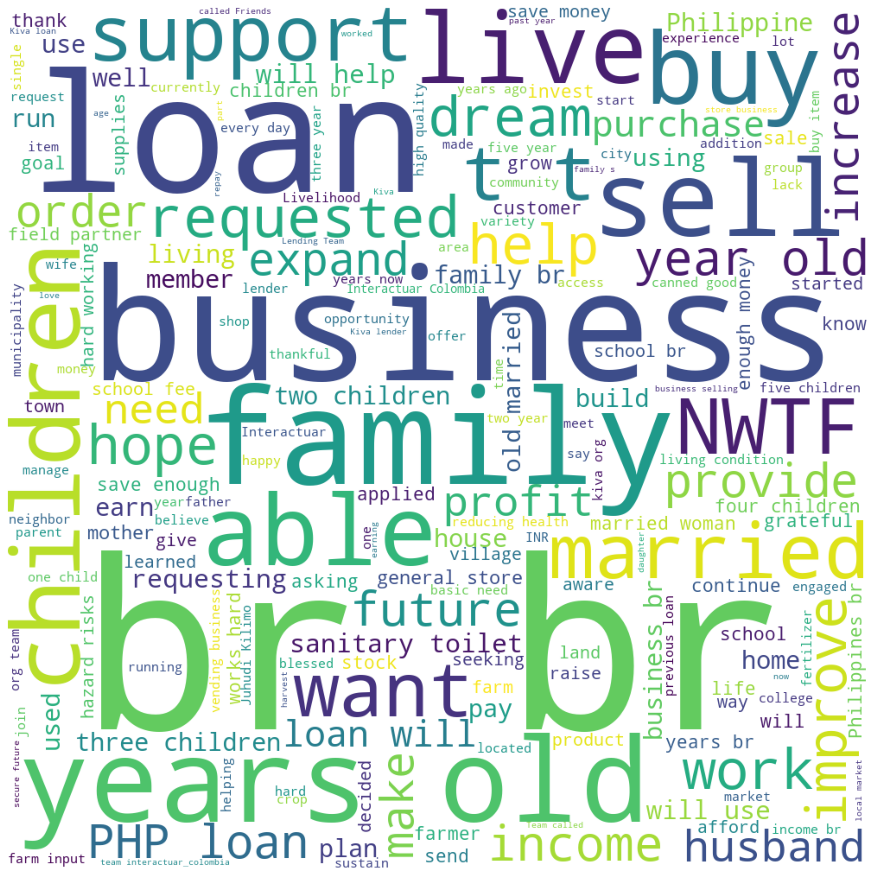

In [100]:
wordcloud = WordCloud(width = 1000, height = 1000, 
                background_color ='white', colormap=matplotlib.cm.viridis,
                min_font_size = 10,stopwords=stopwords).generate(description) 
# plot the WordCloud image                        
plt.figure(figsize = (12, 12), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

## Loan Use

There are 6360397 words in the combination of all review.


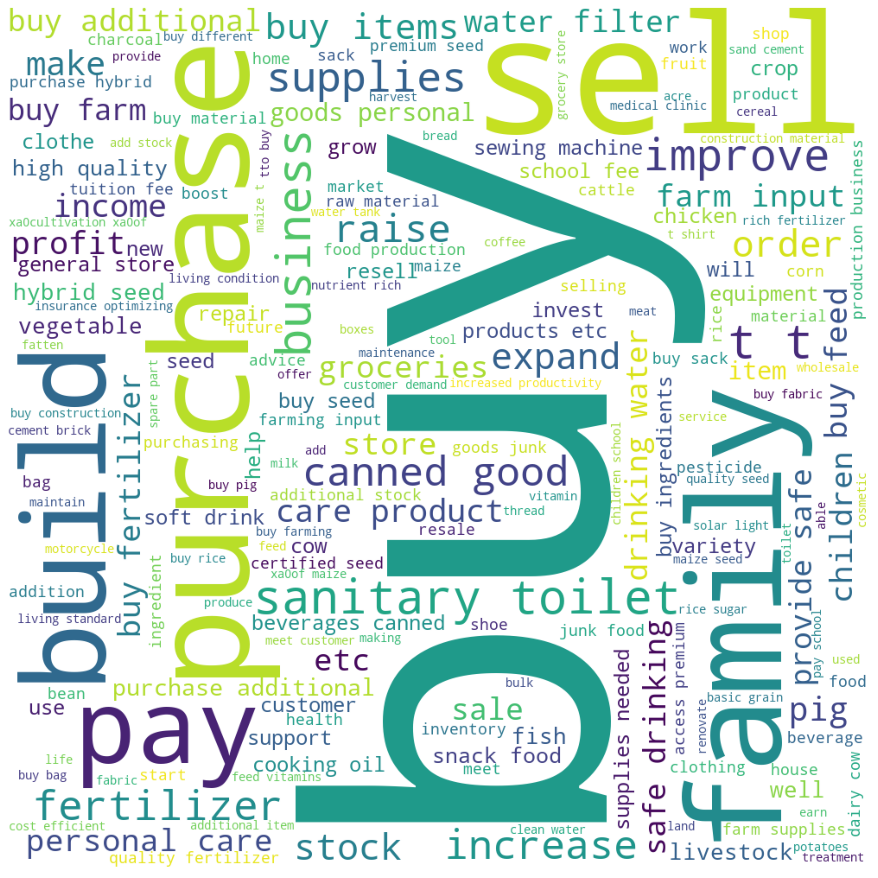

In [104]:
Loan_use = " ".join(loan for loan in df.LOAN_USE)
print ("There are {} words in the combination of all review.".format(len(Loan_use)))

# Create stopword list:
stopwords = set(STOPWORDS)

wordcloud = WordCloud(width = 1000, height = 1000, 
                background_color ='white', colormap=matplotlib.cm.viridis,
                min_font_size = 10,stopwords=stopwords).generate(Loan_use) 
# plot the WordCloud image                        
plt.figure(figsize = (12, 12), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()